# Purchase Descriptive Analytics

## Imports

In [ ]:
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import numpy as np
import pickle
import joblib

In [ ]:
sns.set()

## Read Dataset

In [ ]:
df = pd.read_csv("purchase data.csv"); df.head()

ID  Day  Incidence  Brand  Quantity  Last_Inc_Brand  \
0  200000001    1          0      0         0               0   
1  200000001   11          0      0         0               0   
2  200000001   12          0      0         0               0   
3  200000001   16          0      0         0               0   
4  200000001   18          0      0         0               0   

   Last_Inc_Quantity  Price_1  Price_2  Price_3  ...  Promotion_3  \
0                  0     1.59     1.87     2.01  ...            0   
1                  0     1.51     1.89     1.99  ...            0   
2                  0     1.51     1.89     1.99  ...            0   
3                  0     1.52     1.89     1.98  ...            0   
4                  0     1.52     1.89     1.99  ...            0   

   Promotion_4  Promotion_5  Sex  Marital status  Age  Education  Income  \
0            0            0    0               0   47          1  110866   
1            0            0    0               0   47          1  110866   
2            0            0    0               0   47          1  110866   
3            0            0    0               0   47          1  110866   
4            0            0    0               0   47          1  110866   

   Occupation  Settlement size  
0           1                0  
1           1                0  
2           1                0  
3           1                0  
4           1                0  

[5 rows x 24 columns]

In [ ]:
df.shape

(58693, 24)

In [ ]:
df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Applying Segmentation Model

In [ ]:
pipeline = joblib.load("cluster_pipeline.pkl"); pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

We will extend the clustering function from earlier to generalize our training and prediction

In [ ]:
def do_clustering(df, pipeline, drop_cols=None, sel_cols=None, do_fit=False):
    y = None
    df_new = df.copy()
    if drop_cols: df_new = df_new.drop(columns=drop_cols, axis=1)
    df_filter = df_new.copy()    
    if sel_cols: df_filter = df_new[sel_cols]
    if do_fit:y = pipeline.fit_predict(df_filter)
    else: y = pipeline.predict(df_filter)
    if 'pca' in pipeline.named_steps:
        m = pipeline.named_steps['pca']
        comp_names = [f"PCA{i+1}" for i in range(m.n_components)]
        transform_df = df_filter.copy()
        for step in pipeline.named_steps:
            transform_df = pipeline.named_steps[step].transform(transform_df)
            if step == "pca": break
        pca_df = pd.DataFrame(transform_df, 
                              columns=comp_names, 
                              index=df_filter.index)
        df_new = pd.concat([df_new, pca_df], axis=1)
    df_new['y'] = y+1
    return df_new, pipeline

In [ ]:
sel_cols = ['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']

In [ ]:
df_segments, _ = do_clustering(df, pipeline, sel_cols=sel_cols)

In [ ]:
# df_segments["Visits"] = 1

In [ ]:
names = {1:"Standard",
         2:"Career-Focussed",
         3:"Fewer-Opportunities",
         4:"Well-off"}

df_segments['labels'] = df_segments['y'].map(names)
df_segments.head().T
## May be we might include pca names later as well 

0                    1  \
ID                           200000001            200000001   
Day                                  1                   11   
Incidence                            0                    0   
Brand                                0                    0   
Quantity                             0                    0   
Last_Inc_Brand                       0                    0   
Last_Inc_Quantity                    0                    0   
Price_1                           1.59                 1.51   
Price_2                           1.87                 1.89   
Price_3                           2.01                 1.99   
Price_4                           2.09                 2.09   
Price_5                           2.66                 2.66   
Promotion_1                          0                    0   
Promotion_2                          1                    0   
Promotion_3                          0                    0   
Promotion_4                          0                    0   
Promotion_5                          0                    0   
Sex                                  0                    0   
Marital status                       0                    0   
Age                                 47                   47   
Education                            1                    1   
Income                          110866               110866   
Occupation                           1                    1   
Settlement size                      0                    0   
PCA1                          0.362152             0.362152   
PCA2                         -0.639557            -0.639557   
PCA3                          1.462706             1.462706   
PCA4                         -0.593242            -0.593242   
y                                    3                    3   
labels             Fewer-Opportunities  Fewer-Opportunities   

                                     2                    3  \
ID                           200000001            200000001   
Day                                 12                   16   
Incidence                            0                    0   
Brand                                0                    0   
Quantity                             0                    0   
Last_Inc_Brand                       0                    0   
Last_Inc_Quantity                    0                    0   
Price_1                           1.51                 1.52   
Price_2                           1.89                 1.89   
Price_3                           1.99                 1.98   
Price_4                           2.09                 2.09   
Price_5                           2.66                 2.66   
Promotion_1                          0                    0   
Promotion_2                          0                    0   
Promotion_3                          0                    0   
Promotion_4                          0                    0   
Promotion_5                          0                    0   
Sex                                  0                    0   
Marital status                       0                    0   
Age                                 47                   47   
Education                            1                    1   
Income                          110866               110866   
Occupation                           1                    1   
Settlement size                      0                    0   
PCA1                          0.362152             0.362152   
PCA2                         -0.639557            -0.639557   
PCA3                          1.462706             1.462706   
PCA4                         -0.593242            -0.593242   
y                                    3                    3   
labels             Fewer-Opportunities  Fewer-Opportunities   

                                     4  
ID                           200000001  
Day                                 18  
Incide

## By Consumer

In [ ]:
df_consumer = df_segments[['ID', 'Incidence', 'labels']].groupby('ID').agg({'Incidence':['count', 'sum', 'mean'],'labels':['first']})

In [ ]:
df_consumer.columns = ["_".join(i) for i in df_consumer.columns]

In [ ]:
df_consumer.head()

Incidence_count  Incidence_sum  Incidence_mean         labels_first
ID                                                                            
200000001              101              9        0.089109  Fewer-Opportunities
200000002               87             11        0.126437             Well-off
200000003               97             10        0.103093  Fewer-Opportunities
200000004               85             11        0.129412  Fewer-Opportunities
200000005              111             13        0.117117      Career-Focussed

In [ ]:
df_consumer= df_consumer.rename({'Incidence_count':'N_Visits',
                                 'Incidence_sum': 'N_Purchases', 
                                 'Incidence_mean':'Avg_Purchases',
                                 'labels_first': 'Segments'}, axis=1)
df_consumer.head()

N_Visits  N_Purchases  Avg_Purchases             Segments
ID                                                                  
200000001       101            9       0.089109  Fewer-Opportunities
200000002        87           11       0.126437             Well-off
200000003        97           10       0.103093  Fewer-Opportunities
200000004        85           11       0.129412  Fewer-Opportunities
200000005       111           13       0.117117      Career-Focussed

## Volume of Consumer Per Segment

In [ ]:
sorted(df_consumer['Segments'].unique().tolist())

['Career-Focussed', 'Fewer-Opportunities', 'Standard', 'Well-off']

In [ ]:
my_pallete=dict(zip(sorted(df_consumer['Segments'].unique().tolist()),['g', 'r', 'b', 'y'])); my_pallete

{'Career-Focussed': 'g',
 'Fewer-Opportunities': 'r',
 'Standard': 'b',
 'Well-off': 'y'}

<AxesSubplot:title={'center':'Volume of Customer per Segment'}, ylabel='ID'>

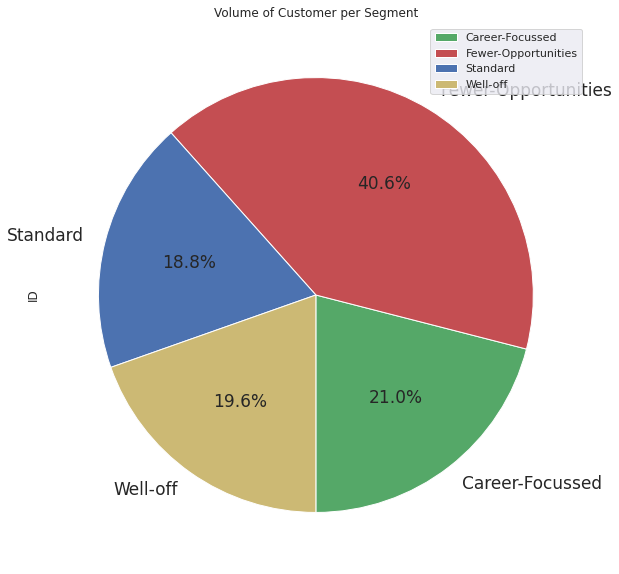

In [ ]:
df_segment_id = df_consumer.reset_index()[['Segments', 'ID']].groupby('Segments').count()
df_segment_id.plot(kind='pie', y='ID', autopct='%1.1f%%', startangle=270, fontsize=17, figsize=(10,10), colors=my_pallete.values(), title='Volume of Customer per Segment') # % Based on Consumer Count

## Purchase Occasion and Purchase Incidence

```{note}
Defines Qualitative Behaviour based on purchase behaviour per segment
```


In [ ]:
df_segment_visits = df_consumer[['Segments', 'N_Visits', 'N_Purchases', 'Avg_Purchases']].groupby('Segments').agg(['sum', 'mean', 'std']); df_segment_visits

N_Visits                        N_Purchases             \
                         sum        mean        std         sum       mean   
Segments                                                                     
Career-Focussed        13065  124.428571  46.085176        4394  41.847619   
Fewer-Opportunities    23085  113.719212  16.236037        4622  22.768473   
Standard               11048  117.531915  18.410903        2231  23.734043   
Well-off               11495  117.295918  20.716152        3391  34.602041   

                               Avg_Purchases                      
                           std           sum      mean       std  
Segments                                                          
Career-Focussed      55.433741     30.886225  0.294155  0.207227  
Fewer-Opportunities  13.584739     40.955542  0.201751  0.118552  
Standard             13.414946     19.315218  0.205481  0.116267  
Well-off             25.900579     27.878841  0.284478  0.171787

### How often do people from a segment visit the store?

[Text(0.5, 1.0, 'Average number of store visits by segment')]

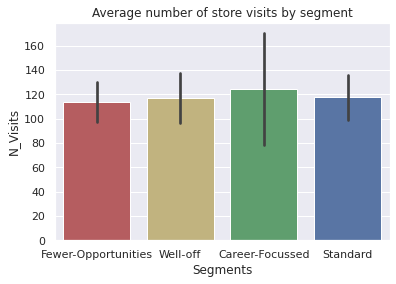

In [ ]:
sns.barplot(data=df_consumer, x='Segments', y='N_Visits', palette=my_pallete, estimator=np.mean, ci='sd').set(title='Average number of store visits by segment')

### How often do people make purchases when they visit the store?

[Text(0.5, 1.0, 'Number of Purchase incidences by segment')]

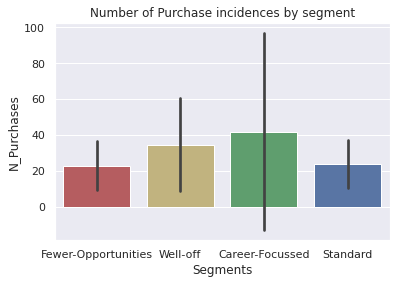

In [ ]:
sns.barplot(data=df_consumer, x='Segments', y='N_Purchases', palette=my_pallete, estimator=np.mean, ci='sd').set(title='Number of Purchase incidences by segment')

```{note}
- Most varied behaviour in Career-Focussed segment in terms of avg. number of store visits and conversions to purchases. May be have sub segments of people who like to spend money differently
- Most homogeneous segment is Fewer Opportunities
- Standard seem to be consistent/ homogeneous as well
- Slightly higher variation in purchase behavior of well off.
```

### Purchase Frequency Relative to store visits(Avg_Purchases)?

[Text(0.5, 1.0, 'Purchase Frequency relative to store visits')]

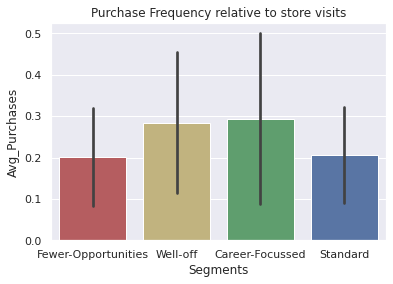

In [ ]:
sns.barplot(data=df_consumer, x='Segments', y='Avg_Purchases', palette=my_pallete, estimator=np.mean, ci='sd').set(title='Purchase Frequency relative to store visits')

## Brand Choice 

- P(Choosing Brand X |Given Purchase Incidence)

In [ ]:
np.sort(df_segments['Brand'].unique())

array([0, 1, 2, 3, 4, 5])

In [ ]:
df_segments[['Incidence','Brand']].groupby('Brand').count()/df_segments.shape[0]

Incidence
Brand           
0       0.750601
1       0.023001
2       0.077386
3       0.014329
4       0.049870
5       0.084814

In [ ]:
df_segments['Incidence'].sum()/df_segments['Incidence'].count() # Only ~25% visits leads to purchases of one or other brand

0.24939941730700424

In [ ]:
(df_segments[df_segments['Brand']>0]['Incidence']==0).sum() # Sanity check for data no brand instances with non zero entry has incidence reported as 0

0

In [ ]:
df_segments_purchase = df_segments[df_segments['Incidence']==1].copy(); df_segments_purchase.shape

(14638, 30)

### Brand Proportions : Which segment is most important for a particular brand?

#### Given a Store Visit. What percentage of brand preference given different segments? (Of Chocalate)

<AxesSubplot:xlabel='labels', ylabel='Brand'>

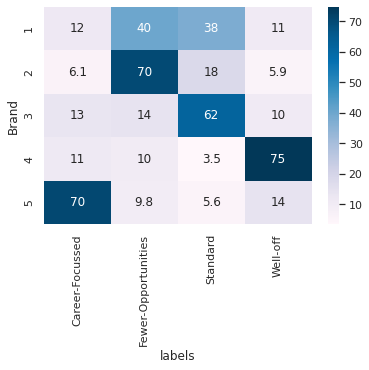

In [ ]:
df_segments_brand = df_segments_purchase[['labels','Brand']].groupby(['labels','Brand'])['Brand'].count().unstack(); df_segments_brand
sns.heatmap((df_segments_brand*100/df_segments_brand.sum()).T, annot=True, cmap='PuBu')

```{admonition} Inference
- Whenever Brand 1 was chosen: Fewer-Opportunities and Standard had leading share 
- Brand 2 choice had highest share from Fewer-Opportunities Group
- Brand 3 choice had highest share from Standard Group
- Brand 4 choice had highest share from Well Off
- Brand 5 choice had highest share from Career Focussed
```

#### Quantity Sales split by segment proportion?

<AxesSubplot:xlabel='labels', ylabel='Brand'>

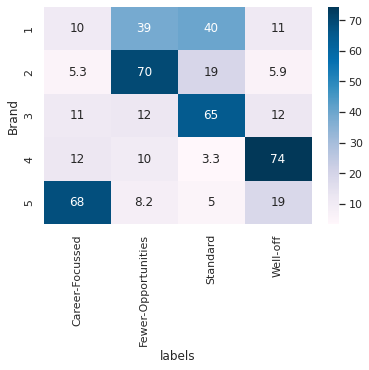

In [ ]:
df_segments_quantity = df_segments_purchase[['labels','Brand', 'Quantity']].groupby(['labels','Brand'])['Quantity'].sum().unstack(); df_segments_quantity
sns.heatmap((df_segments_quantity*100/df_segments_quantity.sum()).T, annot=True, cmap='PuBu')

In [ ]:
df_segments_purchase['Revenue'] = 0

In [ ]:
df_segments_purchase['Revenue']= df_segments_purchase.apply(lambda row: row['Quantity']*row[f"Price_{row['Brand']}"], axis=1)

#### Brand Revenue proportion generated by different segments ( Segment proportion in brand revenue)

<AxesSubplot:xlabel='labels', ylabel='Brand'>

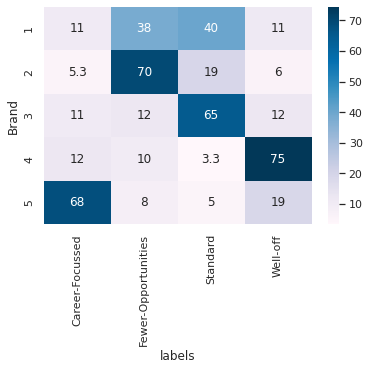

In [ ]:
df_segments_revenue = df_segments_purchase[['labels','Brand', 'Revenue']].groupby(['labels','Brand'])['Revenue'].sum().unstack(); df_segments_revenue
sns.heatmap((df_segments_revenue*100/df_segments_revenue.sum()).T, annot=True, cmap='PuBu')

### From Segment Persepective: On which brand does the segment spends it's most money/wealth?

#### Segment Buying pattern for different brands

<AxesSubplot:xlabel='Brand', ylabel='labels'>

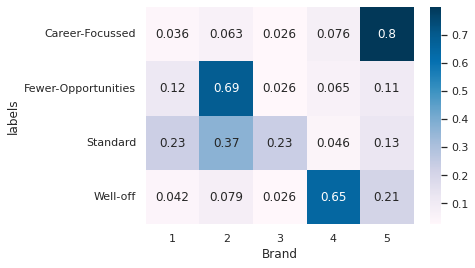

In [ ]:
sns.heatmap((df_segments_brand.T/df_segments_brand.sum(axis=1)).T, annot=True, cmap='PuBu')

<AxesSubplot:xlabel='Brand', ylabel='labels'>

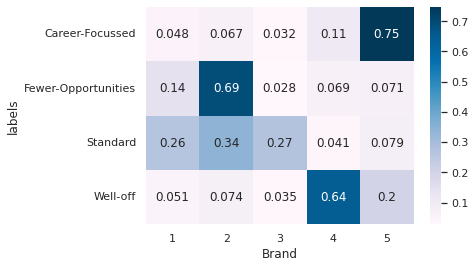

In [ ]:
sns.heatmap((df_segments_quantity.T/df_segments_quantity.sum(axis=1)).T, annot=True, cmap='PuBu')

<AxesSubplot:xlabel='Brand', ylabel='labels'>

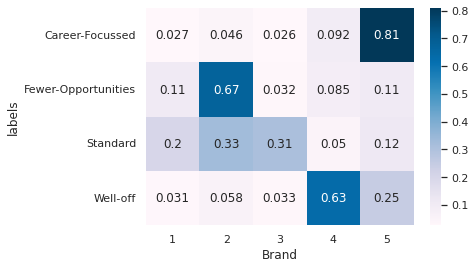

In [ ]:
sns.heatmap((df_segments_revenue.T/df_segments_revenue.sum(axis=1)).T, annot=True, cmap='PuBu')

```{admonition} Inference
- Career-Focussed really prefer to spend money on Brand 5
- Fewer-opportunities prefer to spend money on  Brand 2
- Standard has split preference to spend money on between Brand2 and Brand 3 with significant contribution also from Brand 1
- Well off spends most money on Brand 4 but substantial portion is also spent on Brand 5
```

### Mean Price of Different Brands

In [ ]:
df_segments_purchase.filter(regex='Price*').mean()

Price_1    1.384559
Price_2    1.764717
Price_3    2.006694
Price_4    2.159658
Price_5    2.654296
dtype: float64